<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial Notebook</h1>




Notebook 4: Downstream

# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/

This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.2

In [ ]:
%pip install -U ipywidgets

In [3]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 8.&nbsp;Explainer

The library offers insights into algorithm behavior by identifying which features affect imputation outcomes. It trains a regression model to predict imputation results across different methods and applies SHapley Additive exPlanations (SHAP) to illustrate how various time series features influence the model’s predictions.

All feature extractors developed in ImputeGAP are available in the ``ts.extractors`` module. They can be listed as follows:

In [91]:
ts.extractors

['pycatch', 'tsfel', 'tsfresh']

## 8.1&nbsp;PyCatch22 Extractor

To begin, let's analyze the features extracted by the Pycatch22 extrator.

In [92]:
from imputegap.recovery.manager import TimeSeries
from imputegap.recovery.explainer import Explainer
from imputegap.tools import utils

# initialize the time series and explainer object
ts = TimeSeries()
exp = Explainer()
print(f"\nImputeGAP explainer features extractor : {ts.extractors}")

# load and normalize the dataset
ts.load_series(utils.search_path("eeg-alcohol"), normalizer="z_score")

# configure the explanation
exp.shap_explainer(input_data=ts.data, extractor="pycatch", pattern="mcar", file_name=ts.name, algorithm="CDRec")

# print the impact of each feature
exp.print(exp.shap_values, exp.shap_details)


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


ImputeGAP explainer features extractor : ['pycatch', 'tsfel', 'tsfresh']

(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/eeg-alcohol.txt

> logs: normalization (z_score) of the data - runtime: 0.0005 seconds

explainer launched
	extractor: pycatch 
	imputation algorithm: CDRec 
	params: None 
	missigness pattern: mcar
	missing rate: 40.0%
	nbr of series training set: 38
	nbr of series testing set: 26


Generation  0 / 64 ( 0 %)________________________________________________________
	Contamination  0 ...
feature_name = 'DN_HistogramMode_5' (0/22) : feature_value = -0.2651558150368687
feature_name = 'DN_HistogramMode_10' (1/22) : feature_value = 0.12240744588553376
feature_name = 'CO_f1ecac' (2/22) : feature_value = 4.862960206673732
feature_name = 'CO_FirstMin_ac' (3/22) : feature_value = 1
feature_name = 'CO_HistogramAMI_even_2_5' (4/22) :

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]



	plot has been saved :  ./imputegap_assets/shap/eeg-alcohol_CDRec_pycatch_shap_all.png


	plot has been saved :  ./imputegap_assets/shap/analysis_grouped/eeg-alcohol_CDRec_pycatch_DTL_Waterfall.png


	plot has been saved :  ./imputegap_assets/shap/analysis_grouped/eeg-alcohol_CDRec_pycatch_shap_reverse.png


	plot has been saved :  ./imputegap_assets/shap/analysis_grouped/eeg-alcohol_CDRec_pycatch_DTL_Beeswarm.png


	plot has been saved :  ./imputegap_assets/shap/analysis_per_cat/eeg-alcohol_CDRec_pycatch_shap_geometry.png


	plot has been saved :  ./imputegap_assets/shap/analysis_per_cat/eeg-alcohol_CDRec_pycatch_shap_transformation.png


	plot has been saved :  ./imputegap_assets/shap/analysis_per_cat/eeg-alcohol_CDRec_pycatch_shap_correlation.png


	plot has been saved :  ./imputegap_assets/shap/analysis_per_cat/eeg-alcohol_CDRec_pycatch_shap_trend.png


	plot has been saved :  ./imputegap_assets/shap/eeg-alcohol_CDRec_pycatch_shap_cat.png


	plot has been saved :  ./imputegap_ass

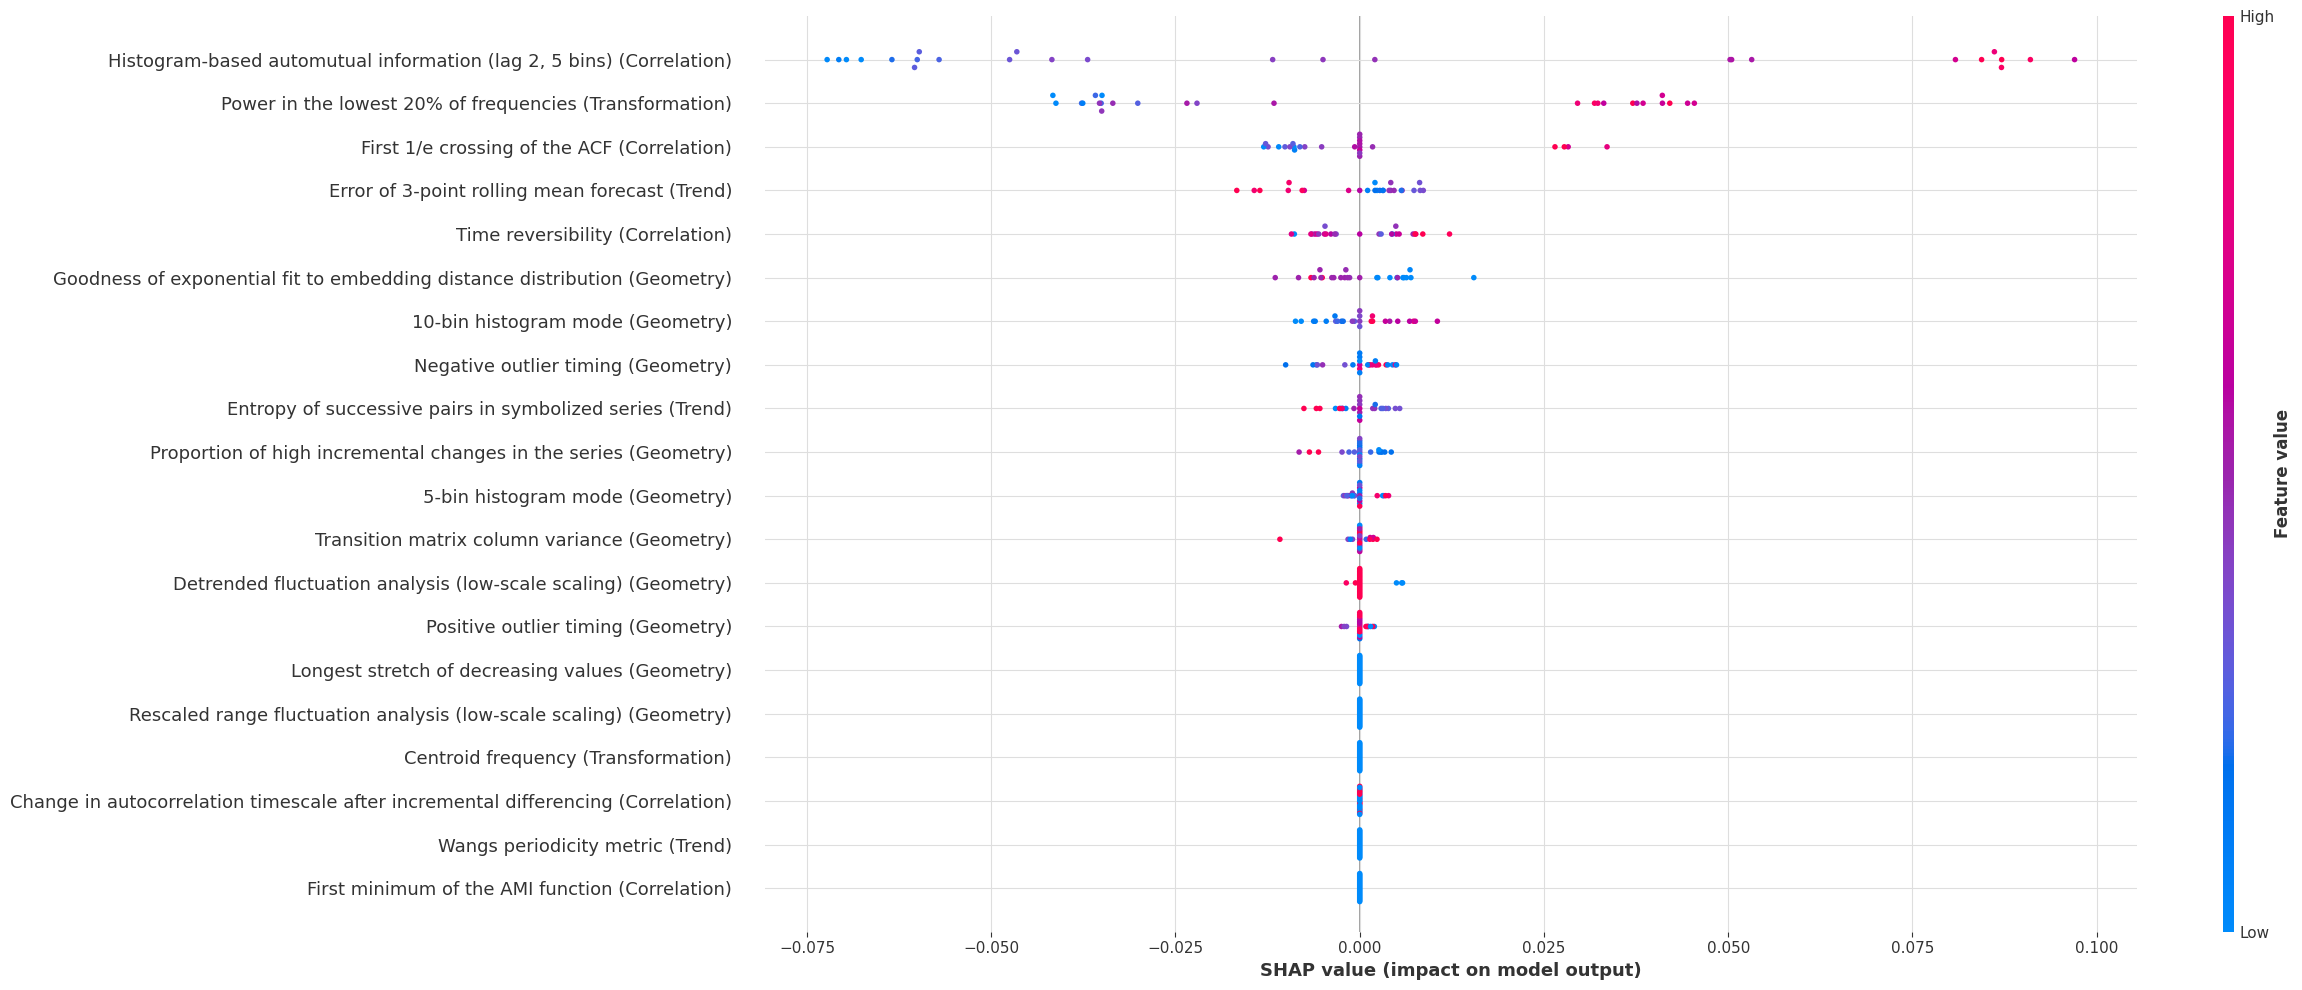

In [93]:
%matplotlib inline
exp.show()

## 8.2&nbsp;TSFEL Extractor

Let’s now see if the TSFEL extractor can provide new insights into the characteristics of the imputation.

In [ ]:
from imputegap.recovery.manager import TimeSeries
from imputegap.recovery.explainer import Explainer
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()
exp = Explainer()

# load and normalize the timeseries
ts.load_series(utils.search_path("eeg-alcohol"))

# configure the explanation
exp.shap_explainer(input_data=ts.data, extractor="tsfel", pattern="mcar", file_name=ts.name, algorithm="CDRec", display=True)

# print the impact of each feature
exp.print(exp.shap_values, exp.shap_details)

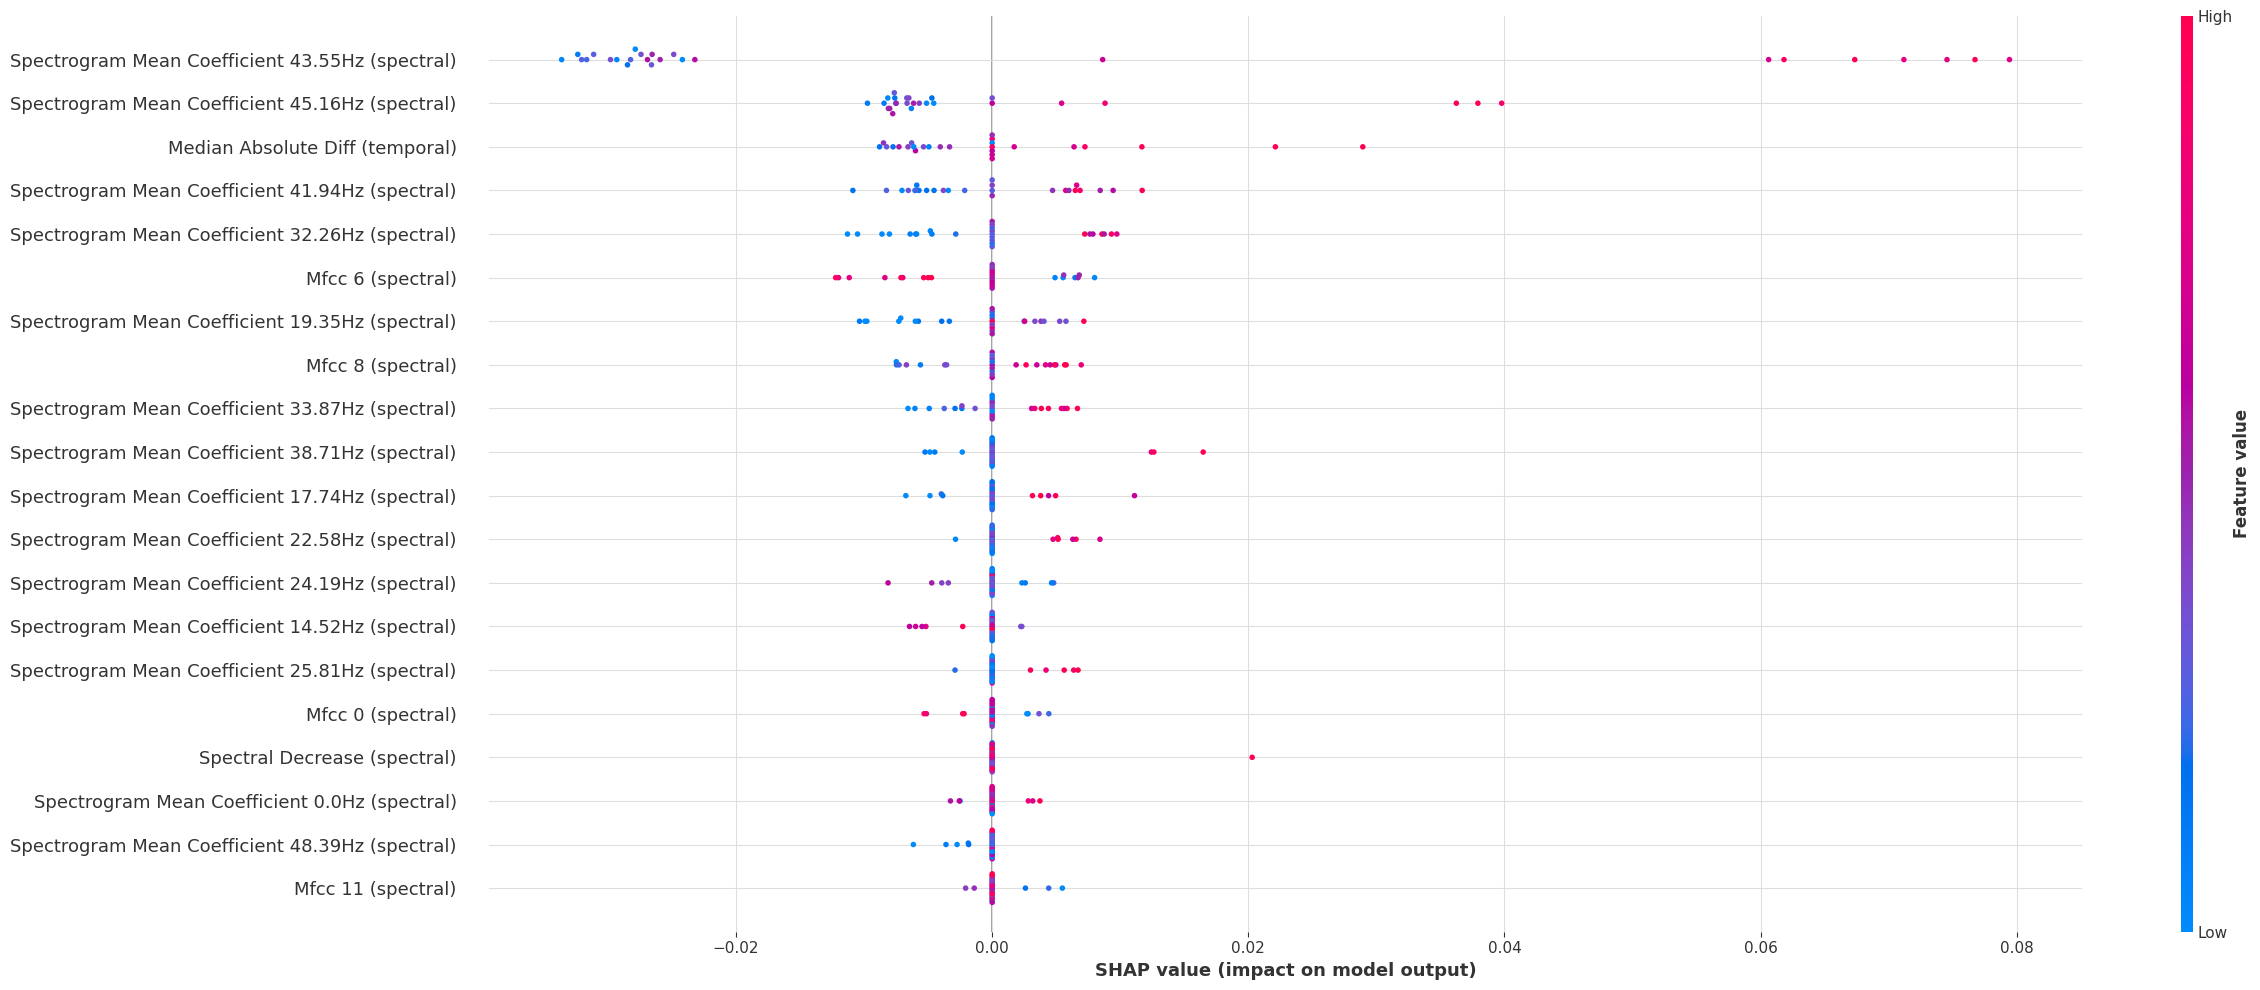

In [95]:
%matplotlib inline
exp.show()

<br>
More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html